# Importing Libraries

In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Loading Data from CSV

In [199]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking for Null Values

In [200]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Using Heatmap to identify the intensity of Null values in a column

<Axes: >

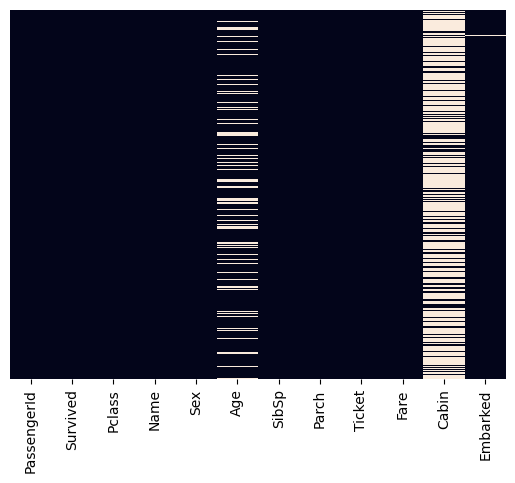

In [201]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# Number of People Unsurvived and Survived

<Axes: xlabel='Survived', ylabel='count'>

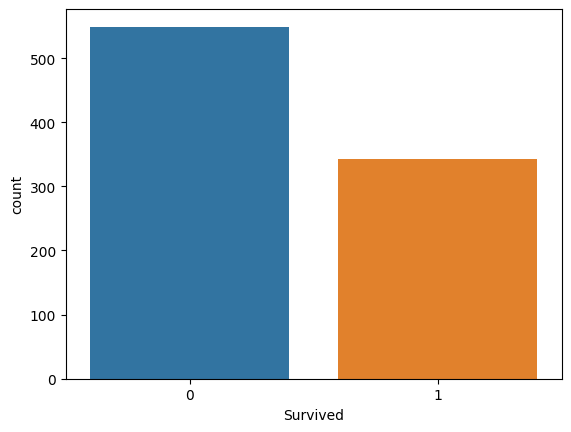

In [202]:
sns.countplot(x='Survived',data=df)

# Survival based on Sex

<Axes: xlabel='Survived', ylabel='count'>

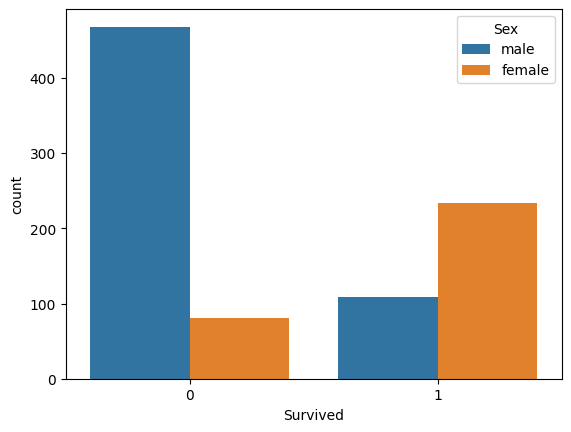

In [203]:
sns.countplot(x="Survived",data= df,hue="Sex")

# Survival rate based on Passenger Class

<Axes: xlabel='Survived', ylabel='count'>

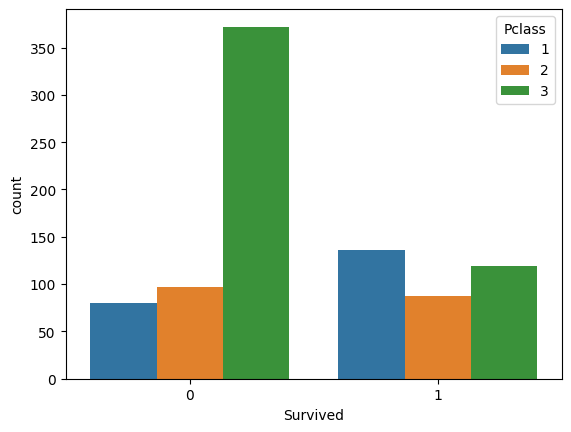

In [204]:
sns.countplot(x="Survived",hue="Pclass",data=df)

# Survival Rate of People having Siblings or Spouse 

<Axes: xlabel='Survived', ylabel='count'>

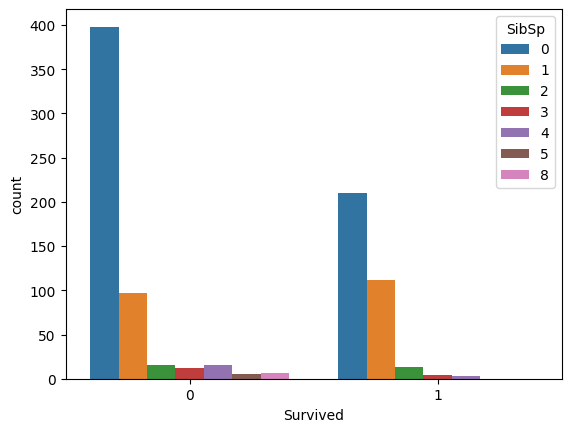

In [205]:
sns.countplot(x="Survived",hue="SibSp",data=df)

# Age of Survived and Unsurvived People based on Sex

<Axes: xlabel='Survived', ylabel='Age'>

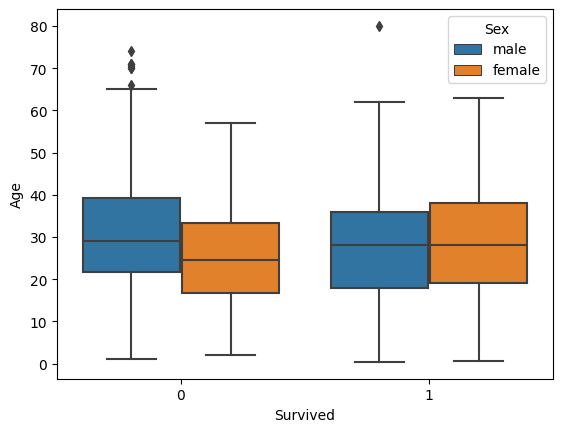

In [206]:
sns.boxplot(x="Survived",y=df['Age'].dropna(),data=df,hue='Sex')

# Age of Survived and Unsurvived People based on Passenger Class 

<Axes: xlabel='Survived', ylabel='Age'>

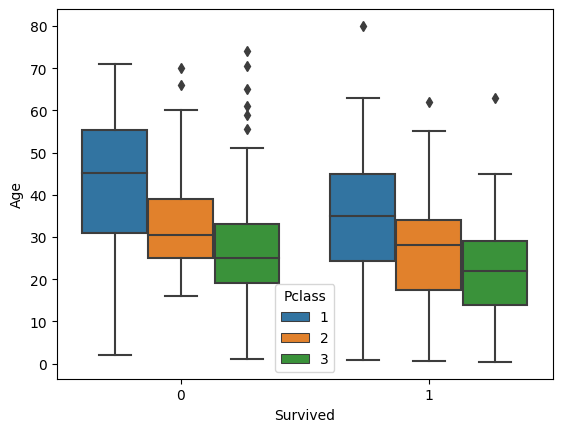

In [207]:
sns.boxplot(x="Survived",y=df['Age'].dropna(),data=df,hue='Pclass')

# Point : We have seen above in the heatmap that Age and Cabin columns have massive null values 

# Average Age of Passengers

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

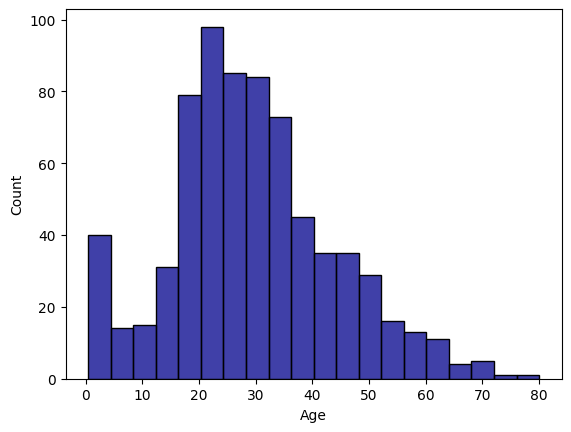

In [208]:
sns.histplot(df['Age'].dropna(),kde=False,color='darkblue')

# Implementing KNN Imputer to get the nan and missing values in Age Column

In [209]:
t_age = df[['Age']]
imputer = KNNImputer(n_neighbors=3)
After_imputation = imputer.fit_transform(t_age)
df['Age'] = After_imputation

# Visulizing the data

# Now we don't have any Null values in Age column

<Axes: >

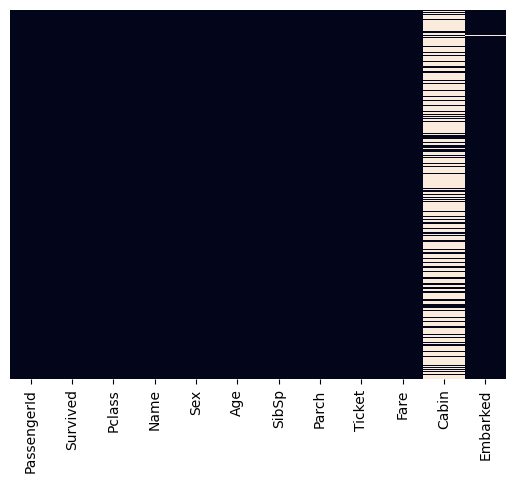

In [210]:
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


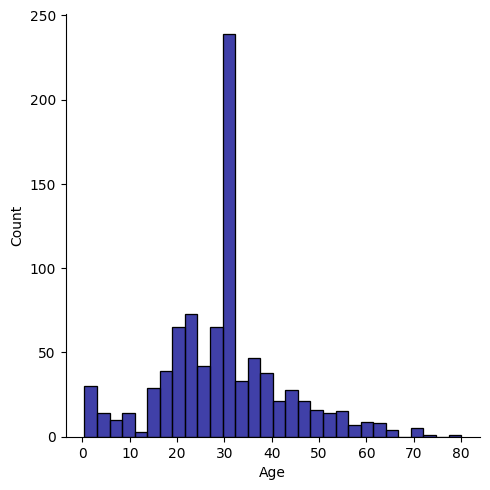

In [211]:
sns.displot(df['Age'].dropna(),kde=False,color='darkblue')

1. Since Null values in Cabin column are much high so it's Rational to drop that column

In [212]:
df.drop('Cabin',axis=1,inplace=True)

In [213]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [214]:
df= df.dropna()

# Converting Catagorical Data into Numerical

In [215]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [216]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


# Converting Boolean values to integer

In [217]:
sex = sex.astype(int)
embark = embark.astype(int)

In [218]:
print("Sex Data")
print(sex.head())
print("Embarked Data")
print(embark.head())

Sex Data
   male
0     1
1     0
2     0
3     0
4     1
Embarked Data
   Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1


# Analyzing Data using Heatmap

# Now Data is Uniform with no Null values

<Axes: >

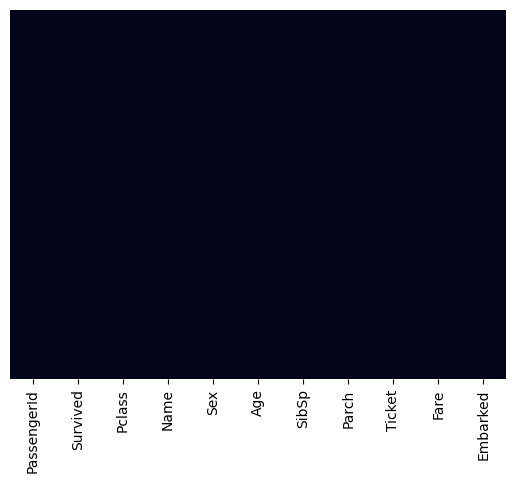

In [219]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# Droping the unnecessary columns before training

In [220]:
df = df.drop(['PassengerId','Name','Sex','Ticket','Embarked'], axis=1)

In [221]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


# Adding the Numeric values to the dataset

In [222]:
df = pd.concat([df,sex,embark],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [223]:
df.rename(columns={'male':'Sex'},inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Using StandardScaler to Normalize the Data

In [224]:
StandardScaler_normalize = StandardScaler()
StandardScaler_y = df['Survived']
StandardScaler_X = StandardScaler_normalize.fit_transform(df.drop('Survived',axis=1))


# Splitting Data into train and test data

In [225]:
X_train, X_test, y_train, y_test = train_test_split(StandardScaler_X,StandardScaler_y,test_size=0.2)

In [226]:
decision_tree = DecisionTreeClassifier()

# Inilizing the Parameters for Hyperparameter tuning for best model output

In [227]:
parameter = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter'  : ['best', 'random'],
    'max_depth' : [None, 5 , 10 , 15],
    'min_samples_split' : [2, 5, 10],
    'max_features' : ['sqrt', 'log2']
}

# Using GridSearchCV

In [228]:
clf = GridSearchCV(decision_tree,parameter,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

# Getting best Parameter for Model

In [229]:
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'splitter': 'best'}
0.8171968876194228


In [230]:
best_param = clf.best_params_

# Training Model with best Parameters

In [231]:
best_decision_tree = DecisionTreeClassifier(**best_param)
best_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='log2')

# Taking Predictions

In [232]:
pred = best_decision_tree.predict(X_test)

In [233]:
print(accuracy_score(y_test,pred))

0.8426966292134831


In [234]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.96      0.88       104\n           1       0.93      0.68      0.78        74\n\n    accuracy                           0.84       178\n   macro avg       0.87      0.82      0.83       178\nweighted avg       0.86      0.84      0.84       178\n'

# Model Output using MinMaxScaler

In [235]:
MinMax_normalize = MinMaxScaler()
MinMax_y = df['Survived']
MinMax_X = MinMax_normalize.fit_transform(df.drop('Survived',axis=1))

In [236]:
X_train, X_test, y_train, y_test = train_test_split(MinMax_X,MinMax_y,test_size=0.2)

In [237]:
decision_tree = DecisionTreeClassifier()

# Using Same Parameters as Above

In [238]:
parameter = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter'  : ['best', 'random'],
    'max_depth' : [None, 5 , 10 , 15],
    'min_samples_split' : [2, 5, 10],
    'max_features' : ['sqrt', 'log2']
}

In [239]:
clf = GridSearchCV(decision_tree,parameter,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [240]:
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'splitter': 'best'}
0.8171574903969271


In [241]:
best_param = clf.best_params_

# Training with best parameters

In [242]:
best_decision_tree = DecisionTreeClassifier(**best_param)
best_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='log2')

In [243]:
pred = best_decision_tree.predict(X_test)

In [244]:
print(accuracy_score(y_test,pred))

0.8258426966292135


In [245]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.94      0.87       111\n           1       0.86      0.64      0.74        67\n\n    accuracy                           0.83       178\n   macro avg       0.84      0.79      0.80       178\nweighted avg       0.83      0.83      0.82       178\n'